# **Importing Libraries And Dataset**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
df = pd.read_csv("/content/Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# **Preprocessing Dataset**

In [71]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [73]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [74]:
df_enc = pd.get_dummies(df, drop_first=True)
df_enc.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [75]:
Q1 = df_enc[['area', 'price']].quantile(0.25)
Q3 = df_enc[['area', 'price']].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_enc[
    (df_enc['area'] >= lower_bound['area']) & (df_enc['area'] <= upper_bound['area']) &
    (df_enc['price'] >= lower_bound['price']) & (df_enc['price'] <= upper_bound['price'])
]

print(f"Before removing outliers: {df_enc.shape[0]} rows")
print(f"After removing outliers: {df_no_outliers.shape[0]} rows")


Before removing outliers: 545 rows
After removing outliers: 520 rows


# **Splitting Data Into Test-Train Sets**

In [76]:
X = df_no_outliers[['area']]

y = df_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (416, 1)
Test shape: (104, 1)


# **Fitting A Linear Regression Model**

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# **Evaluating Model Using MAE, MSE, R2**

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")


📊 Model Evaluation:
Mean Absolute Error (MAE): 1208074.12
Mean Squared Error (MSE): 2279660501775.07
R² Score: 0.268


# **Plotting Regression Line**

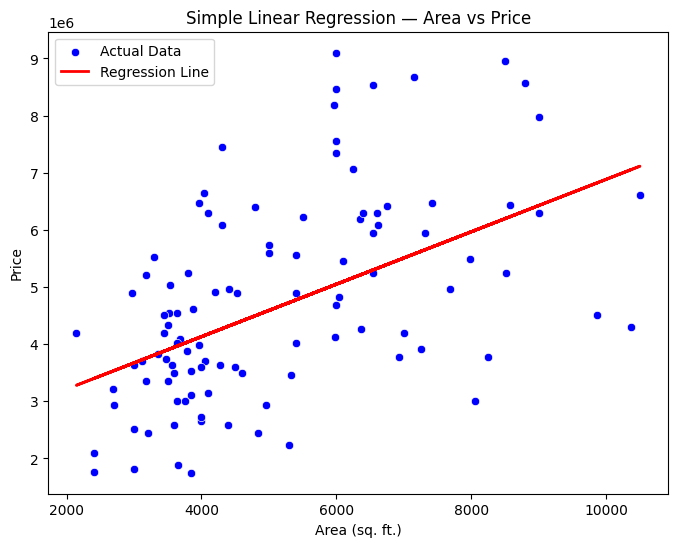

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['area'], y=y_test, color='blue', label='Actual Data')
plt.plot(X_test['area'], y_pred, color='red', linewidth=2, label='Regression Line')

plt.title("Simple Linear Regression — Area vs Price")
plt.xlabel("Area (sq. ft.)")
plt.ylabel("Price")
plt.legend()
plt.show()

In [80]:
print(f"Intercept (b₀): {model.intercept_:.2f}")
print(f"Coefficient (b₁): {model.coef_[0]:.2f}")
print(f"Equation: price = {model.intercept_:.2f} + {model.coef_[0]:.2f} × area")

Intercept (b₀): 2295301.04
Coefficient (b₁): 458.96
Equation: price = 2295301.04 + 458.96 × area


# **Interpreting Coefficients**

Feature Coefficients (Impact on Price):


,Feature,Coefficient
0,area,458.960348


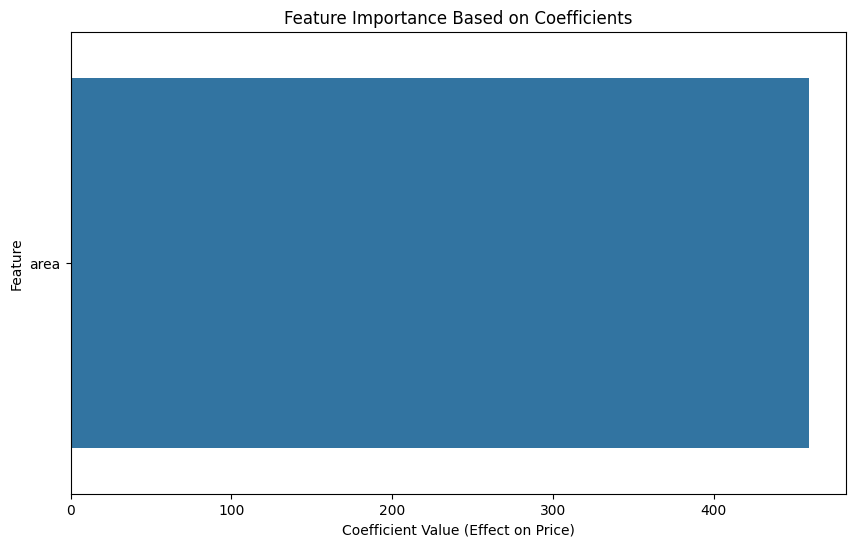

In [81]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients (Impact on Price):")
display(coef_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance Based on Coefficients")
plt.xlabel("Coefficient Value (Effect on Price)")
plt.ylabel("Feature")
plt.show()
